In [1]:
#Attribute Information:

#Class Values:

#unacc, acc, good, vgood

#Attributes:

#buying: vhigh, high, med, low.
#maint: vhigh, high, med, low.
#doors: 2, 3, 4, 5more.
#persons: 2, 4, more.
#lug_boot: small, med, big.
#safety: low, med, high.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('car_evaluation.csv')
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [4]:
columns = ["buying","maint","doors","persons","lug_boot","safety","Class Values"]
df = pd.read_csv('car_evaluation.csv',header=None,names=columns)
df

,buying,maint,doors,persons,lug_boot,safety,Class Values
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [5]:
#EDA process
df.keys()

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'Class Values'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying          1728 non-null object
maint           1728 non-null object
doors           1728 non-null object
persons         1728 non-null object
lug_boot        1728 non-null object
safety          1728 non-null object
Class Values    1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
df.dtypes

buying          object
maint           object
doors           object
persons         object
lug_boot        object
safety          object
Class Values    object
dtype: object

In [8]:
df.isnull().sum()

buying          0
maint           0
doors           0
persons         0
lug_boot        0
safety          0
Class Values    0
dtype: int64

In [9]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,Class Values
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [10]:
df.tail()

,buying,maint,doors,persons,lug_boot,safety,Class Values
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


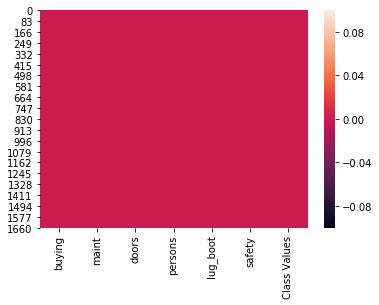

In [11]:
import seaborn as sns
sns.heatmap(df.isnull())

In [12]:
df = pd.DataFrame(data=df)
df

,buying,maint,doors,persons,lug_boot,safety,Class Values
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [14]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,Class Values
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,3,2,big,high,unacc
freq,432,432,432,576,576,576,1210


In [15]:
#Check the Uniqueness
df['buying'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [16]:
df['maint'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [17]:
df['doors'].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [18]:
df['persons'].unique()

array(['2', '4', 'more'], dtype=object)

In [19]:
df['lug_boot'].unique()

array(['small', 'med', 'big'], dtype=object)

In [20]:
df['safety'].unique()

array(['low', 'med', 'high'], dtype=object)

In [21]:
df['Class Values'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [23]:
#the dataset into Numeric(boolean) Format using label encoder
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

#For all those columns who has 3 attributes
from sklearn import preprocessing
for cols in df.columns:
    if(len(df[cols].value_counts()) ==3):                  #Unique values
        le_anima = preprocessing.LabelEncoder()
        df[cols] = le_anima.fit_transform(df[cols])
        
#For all those columns who has 4 attributes
from sklearn import preprocessing
for cols in df.columns:
    if(len(df[cols].value_counts()) ==4):               #Unique values
        le_anima = preprocessing.LabelEncoder()
        df[cols] = le_anima.fit_transform(df[cols])

In [24]:
df.dtypes

buying          int32
maint           int32
doors           int32
persons         int64
lug_boot        int64
safety          int64
Class Values    int32
dtype: object

In [25]:
df = pd.DataFrame(data=df)
df

,buying,maint,doors,persons,lug_boot,safety,Class Values
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [27]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,Class Values
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,1.553241
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733,0.875948
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,0.750000,0.000000,0.000000,0.000000,1.000000
50%,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,2.000000
75%,2.250000,2.250000,2.250000,2.000000,2.000000,2.000000,2.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000


In [28]:
#co-relation

dfcor = df.corr()
dfcor

,buying,maint,doors,persons,lug_boot,safety,Class Values
buying,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051424
maint,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.040194
doors,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-0.031327
persons,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.299468
lug_boot,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.033184
safety,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.021044
Class Values,0.051424,0.040194,-0.031327,-0.299468,0.033184,-0.021044,1.000000


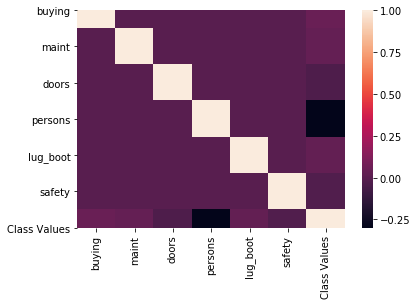

In [29]:
sns.heatmap(dfcor)

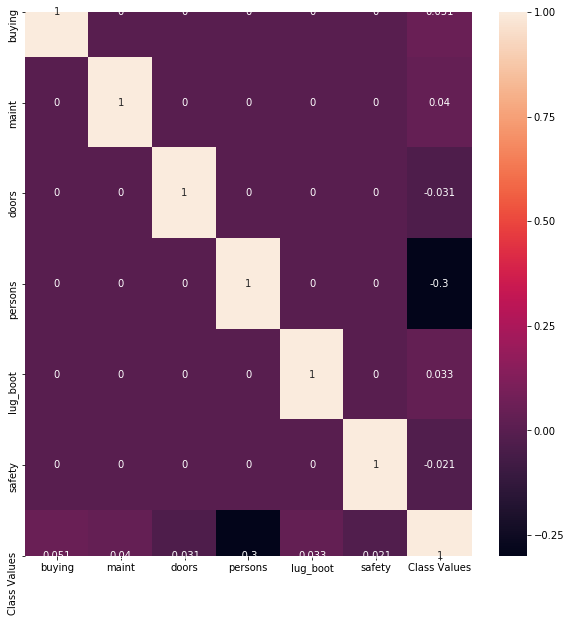

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(dfcor,color='red',annot=True)

In [32]:
#finding the skewness of the dataset

df.skew()

buying          0.000000
maint           0.000000
doors           0.000000
persons         0.000000
lug_boot        0.000000
safety          0.000000
Class Values   -0.988383
dtype: float64

In [33]:
##there is some skewness which need to be treated,by seeing we can say only +ve skewness is significant and needs to be treated
#if value is 0.55 or more than that then there would be a skewed value.

#removing the skewness of the dataset using the log

for i in df.columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])
    if df.skew().loc[i]<-0.55:
        df[i]=np.square(df[i])
        
df.skew()

buying          0.000000
maint           0.000000
doors           0.000000
persons         0.000000
lug_boot        0.000000
safety          0.000000
Class Values    0.029179
dtype: float64

In [34]:
#finding the outliers

from scipy.stats import zscore

z=abs(zscore(df))
print('df.shape:',df.shape)
df1=df.loc[(z<3).all(axis=1)]
print('df1.shape:',df1.shape)
print("z value is:",z)

df.shape: (1728, 7)
df1.shape: (1728, 7)
z value is: [[1.34164079 1.34164079 1.34164079 ... 1.22474487 0.         0.40127654]
 [1.34164079 1.34164079 1.34164079 ... 1.22474487 1.22474487 0.40127654]
 [1.34164079 1.34164079 1.34164079 ... 1.22474487 1.22474487 0.40127654]
 ...
 [0.4472136  0.4472136  1.34164079 ... 1.22474487 0.         0.40127654]
 [0.4472136  0.4472136  1.34164079 ... 1.22474487 1.22474487 1.06573162]
 [0.4472136  0.4472136  1.34164079 ... 1.22474487 1.22474487 2.84629013]]


In [35]:
df.keys()

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'Class Values'],
      dtype='object')

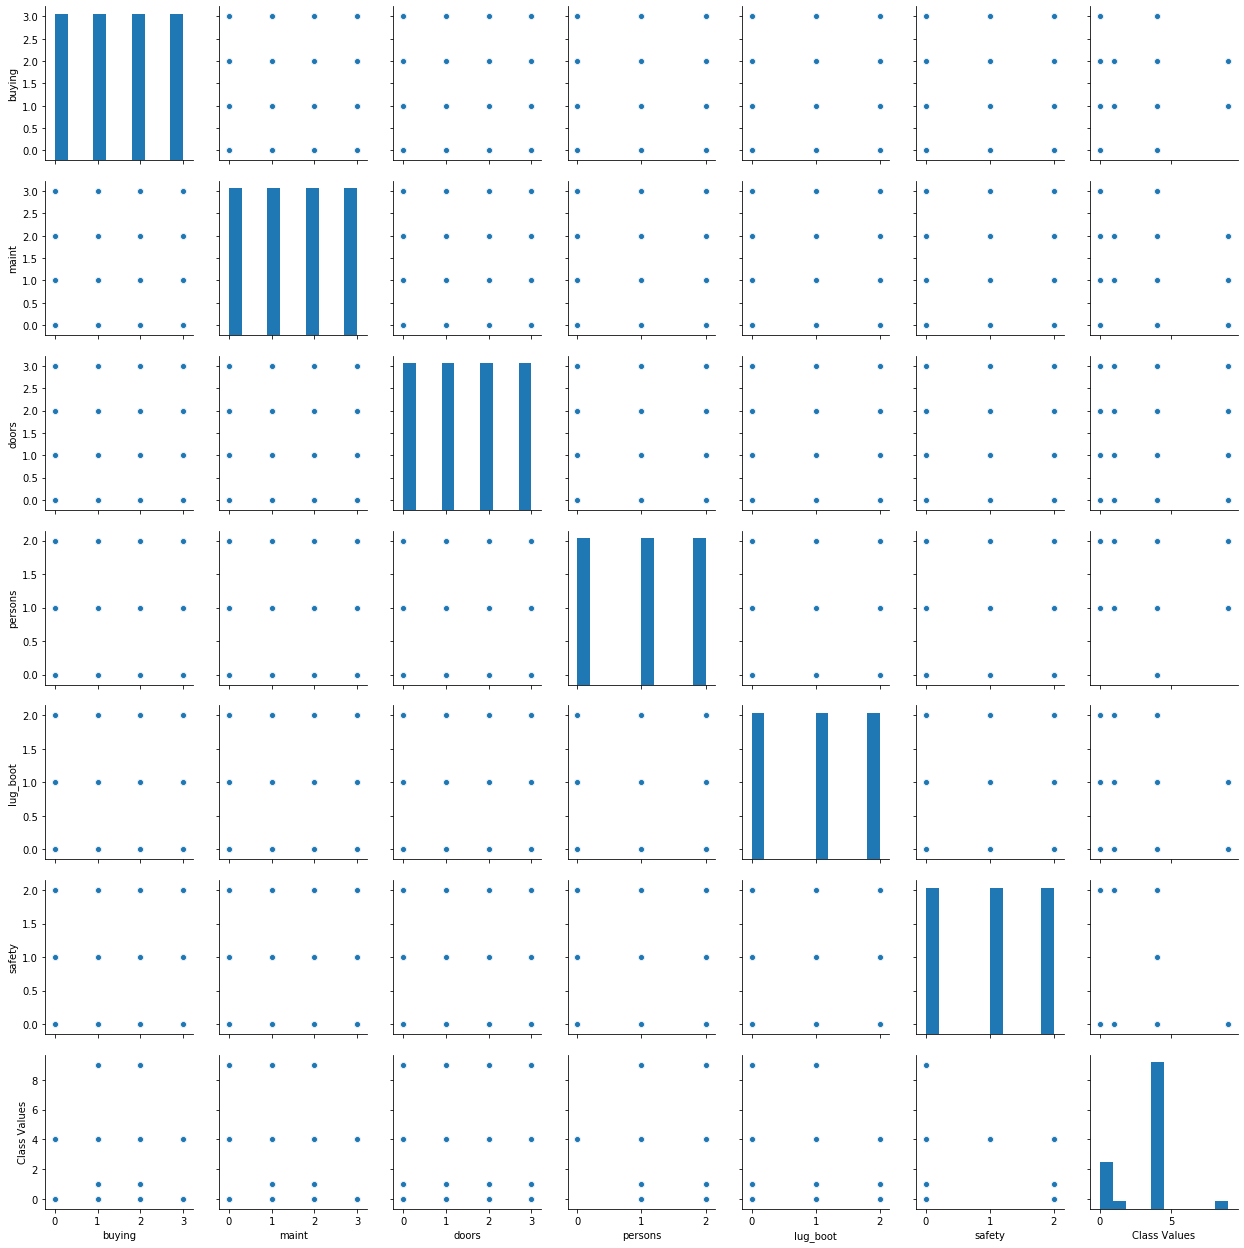

In [37]:
#Lets Check the pairplot using seaborn Library
import seaborn as sns
sns.pairplot(df)
plt.show()

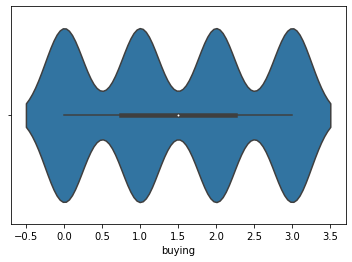

In [39]:
#violin plot representation with respect to each column

sns.violinplot(x="buying",data=df)

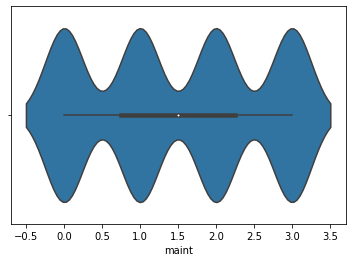

In [40]:
sns.violinplot(x="maint",data=df)

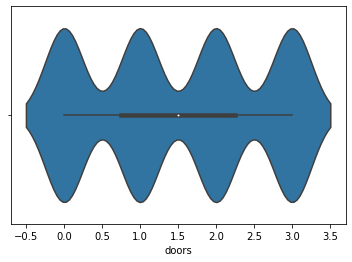

In [41]:
sns.violinplot(x="doors",data=df)

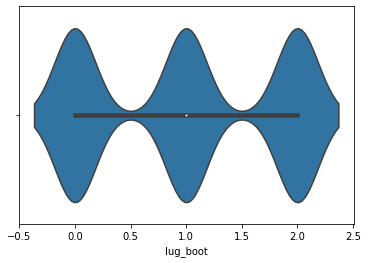

In [42]:
sns.violinplot(x="lug_boot",data=df)

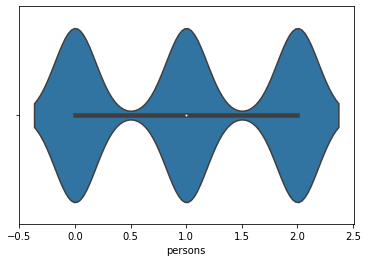

In [43]:
sns.violinplot(x="persons",data=df)

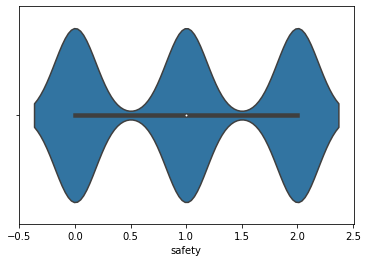

In [44]:
sns.violinplot(x="safety",data=df)

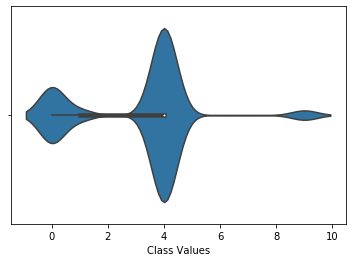

In [45]:
sns.violinplot(x="Class Values",data=df)

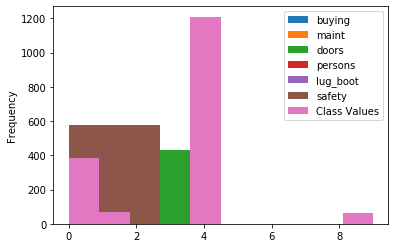

In [46]:
df.plot.hist()

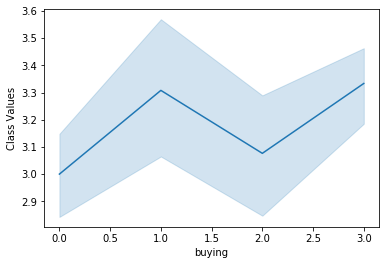

In [49]:
#Lets check the how buying is changing with respect to Class Values
sns.lineplot(df["buying"],df["Class Values"])
plt.show()

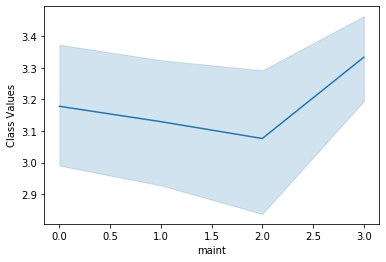

In [50]:
sns.lineplot(df["maint"],df["Class Values"])
plt.show()

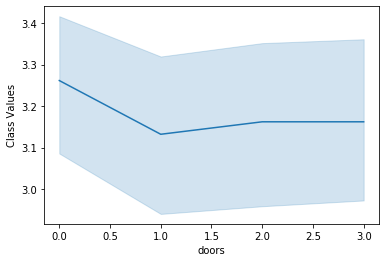

In [51]:
sns.lineplot(df["doors"],df["Class Values"])
plt.show()

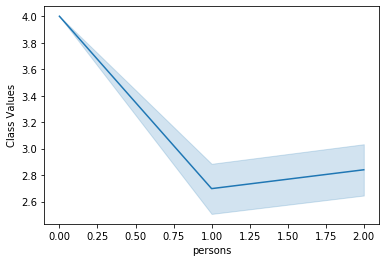

In [52]:
sns.lineplot(df["persons"],df["Class Values"])
plt.show()

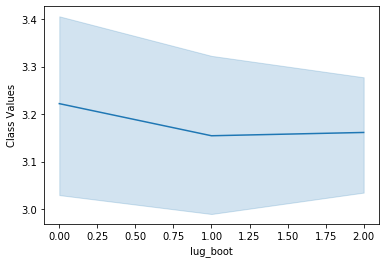

In [53]:
sns.lineplot(df["lug_boot"],df["Class Values"])
plt.show()

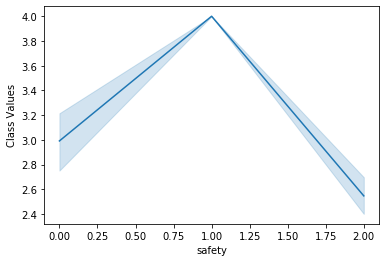

In [54]:
sns.lineplot(df["safety"],df["Class Values"])
plt.show()

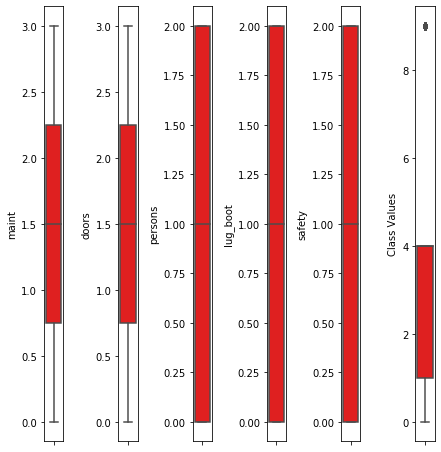

In [55]:
#column Plot
collist = df.columns.values
ncols=15
nrows=12
plt.figure(figsize=(ncols,5*ncols))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(df[collist[i]],color='red',orient='v')
    plt.tight_layout()

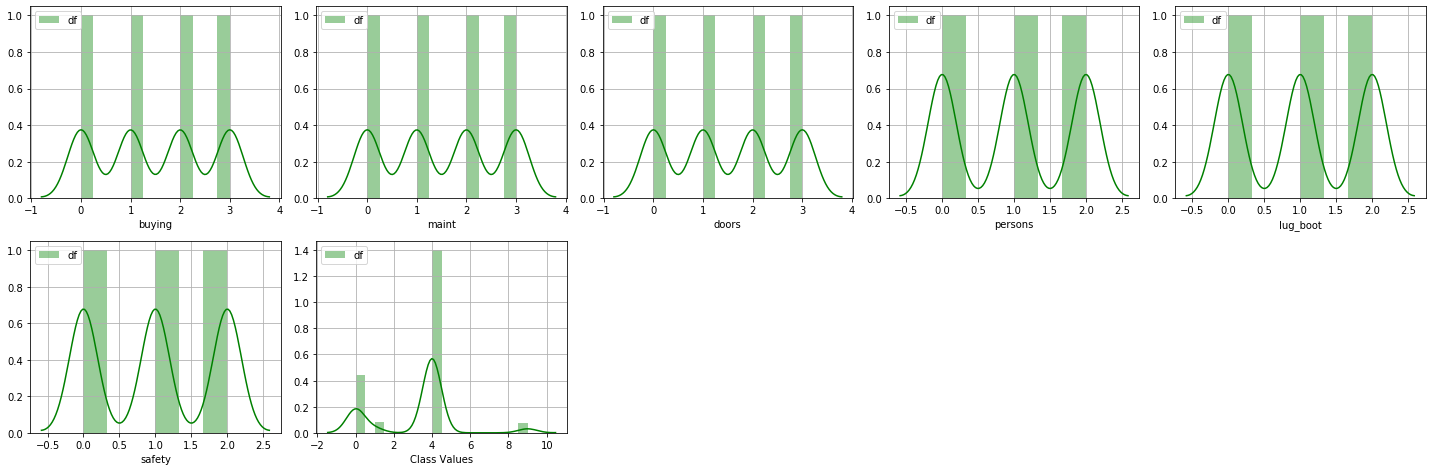

In [56]:
#displot through the iteration
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(df[col],color='g',kde=True,label='df')
    plt.grid()
    plt.legend(loc='upper left')
    plt.tight_layout()

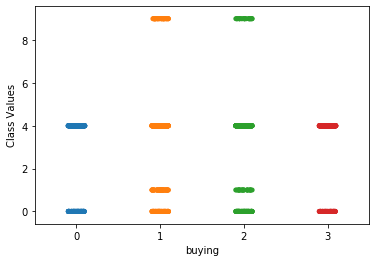

In [59]:
ax=sns.stripplot(x='buying',y="Class Values",data=df);

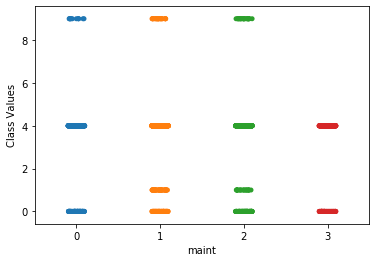

In [60]:
ax=sns.stripplot(x='maint',y="Class Values",data=df);

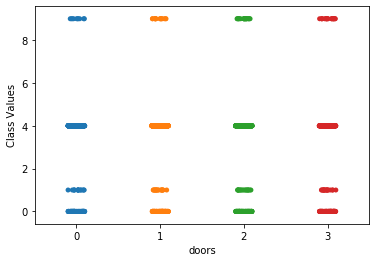

In [61]:
ax=sns.stripplot(x='doors',y="Class Values",data=df);

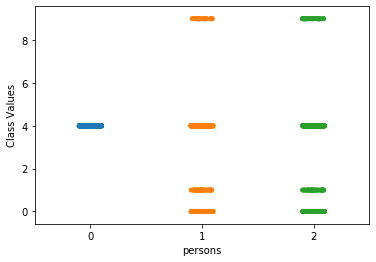

In [62]:
ax=sns.stripplot(x='persons',y="Class Values",data=df);

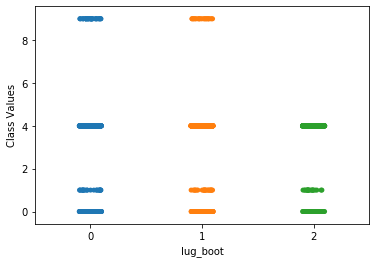

In [63]:
ax=sns.stripplot(x='lug_boot',y="Class Values",data=df);

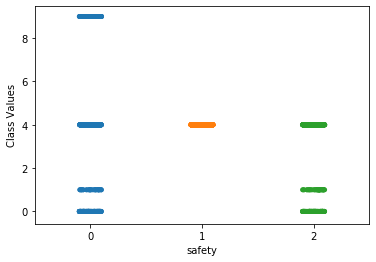

In [64]:
ax=sns.stripplot(x='safety',y="Class Values",data=df);

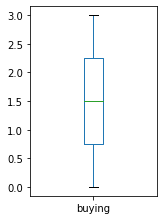

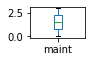

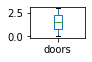

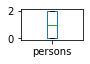

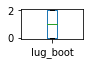

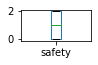

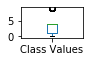

In [65]:
#boxplot

import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
for i,col in enumerate(list(df.columns.values)):
    plt.subplot(5,5,i+1)
    df.boxplot(col)
    plt.grid()
    plt.tight_layout()
    plt.show()

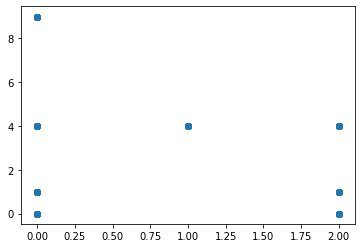

In [66]:
plt.scatter(df["safety"],df["Class Values"])

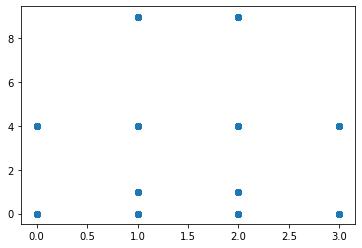

In [68]:
plt.scatter(df["buying"],df["Class Values"])

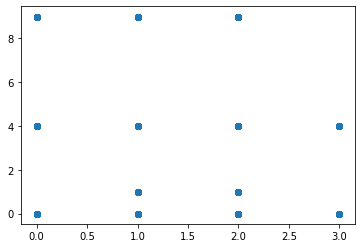

In [69]:
plt.scatter(df["maint"],df["Class Values"])

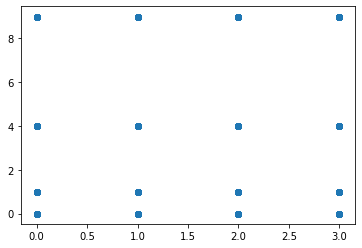

In [70]:
plt.scatter(df["doors"],df["Class Values"])

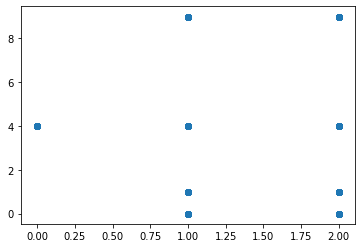

In [71]:
plt.scatter(df["persons"],df["Class Values"])

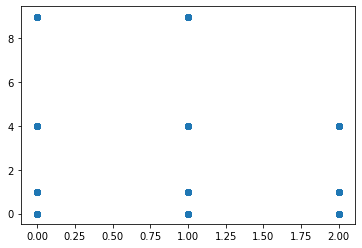

In [72]:
plt.scatter(df["lug_boot"],df["Class Values"])

In [73]:
#Separating X and Y Variable to predict the dataset

X = df.drop("Class Values", axis=1)
X

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2
...,...,...,...,...,...,...
1723,1,1,3,2,1,2
1724,1,1,3,2,1,0
1725,1,1,3,2,0,1
1726,1,1,3,2,0,2


In [75]:
Y = df["Class Values"]
Y

0       4
1       4
2       4
3       4
4       4
       ..
1723    1
1724    9
1725    4
1726    1
1727    9
Name: Class Values, Length: 1728, dtype: int32

In [76]:
Y.shape

(1728,)

In [77]:
Y = Y.values.reshape(-1,1)
Y

array([[4],
       [4],
       [4],
       ...,
       [4],
       [1],
       [9]])

In [78]:
Y.shape

(1728, 1)

In [83]:
#splitting the data into training and testing

train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.22,random_state=39)

In [84]:
train_X.shape

(1347, 6)

In [85]:
train_Y.shape

(1347, 1)

In [86]:
test_X.shape

(381, 6)

In [87]:
test_Y.shape

(381, 1)

In [89]:
#Applying the logistic regression

lg=LogisticRegression()
lg.fit(train_X,train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
pred=lg.predict(test_X)
print(pred)

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 4 0 4 4 4 4 4 4 0 4 4 9 4 4 0 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 0 4 4 0 0 4 4 4 4 0 4 4 4 4 4 4
 4 4 4 0 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 9 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 0 4 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 0 4
 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 0 4 0 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 0 0 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 0
 0 0 0 4 4 4 0 4 4 4 4 4 4 4 4 4 4 0 4 0 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4
 0 4 4 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 0 4 0 4
 0 4 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 0 4
 4 4 4 4 4 4 4 4 4 4 0]


In [91]:
print("accuracy score:",accuracy_score(pred,test_Y))
print("confusion_matrix: \n",confusion_matrix(test_Y,pred))
print("classification_report:\n",classification_report(test_Y,pred))


accuracy score: 0.7322834645669292
confusion_matrix: 
 [[ 19   0  60   2]
 [  2   0  12   0]
 [ 14   0 260   0]
 [  8   0   4   0]]
classification_report:
               precision    recall  f1-score   support

           0       0.44      0.23      0.31        81
           1       0.00      0.00      0.00        14
           4       0.77      0.95      0.85       274
           9       0.00      0.00      0.00        12

    accuracy                           0.73       381
   macro avg       0.30      0.30      0.29       381
weighted avg       0.65      0.73      0.68       381



In [92]:
#Using Cross Validation to Check Overfitting,Underfitting and Predict the Resulte
from sklearn.model_selection import cross_val_score
cvlg1 = cross_val_score(lg,X,Y,cv=10,scoring='accuracy').mean()
print('cvlg1:',cvlg1)

cvlg2 = cross_val_score(lg,X,Y,cv=15,scoring='accuracy').mean()
print('cvlg2:',cvlg2)

cvlg1: 0.6621069378664425
cvlg2: 0.6730859052856065


In [93]:
#Grid Search Cross Validation for Logistic Regression
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
lg1=LogisticRegression()
lg1_cv=GridSearchCV(lg1,grid,cv=10)
lg1_cv.fit(train_X,train_Y)

print("tuned hpyerparameters :(best parameters) ",lg1_cv.best_params_)
print("accuracy :",lg1_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}
accuracy : 0.7000742390497402


In [94]:
lg2=LogisticRegression(C=0.01,penalty="l2")
lg2.fit(train_X,train_Y)
print("score",lg2.score(test_X,test_Y))

score 0.7349081364829396


In [96]:
#Boost the Dataset by AdaBoost and GradiantBoost
from sklearn.ensemble import AdaBoostClassifier
modelad = AdaBoostClassifier()
modelad.fit(train_X,train_Y)
print(modelad.score(train_X,train_Y))
abpred=modelad.predict(test_X)
print(abpred)
modelad.score(test_X,test_Y)

print("-----\n")

#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
modelgb=GradientBoostingClassifier()
modelgb.fit(train_X,train_Y)
print(modelgb.score(train_X,train_Y))
abpred=modelgb.predict(test_X)
print(abpred)
modelgb.score(test_X,test_Y)


0.7334818114328137
[0 4 4 0 4 4 0 4 4 4 4 4 4 4 0 0 4 4 4 4 4 4 0 4 4 4 4 4 0 9 4 0 9 4 4 4 4
 4 4 4 4 4 4 4 4 9 0 4 0 4 0 0 4 4 4 4 0 4 9 4 0 0 0 4 9 4 4 4 4 4 0 4 0 4
 4 4 0 9 4 4 4 9 4 4 0 0 0 4 4 4 0 0 4 9 4 0 4 4 4 4 4 0 4 4 4 4 4 0 0 4 0
 0 4 0 4 4 4 4 4 0 4 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 4 0 4 4 4 4 4 0 0
 4 0 4 4 4 4 4 4 4 4 4 0 4 0 4 4 4 4 4 4 9 4 4 9 4 4 0 0 4 0 0 0 9 4 4 4 4
 0 4 4 4 0 4 4 4 9 4 4 0 4 4 4 9 0 4 4 9 4 4 4 4 0 4 4 0 4 4 4 4 9 9 4 4 0
 0 0 0 4 0 0 0 4 0 9 0 4 4 4 0 0 4 9 0 9 4 4 4 4 0 0 4 0 0 4 0 4 4 4 4 4 0
 0 0 4 0 4 4 4 4 4 4 4 0 4 0 4 4 4 4 4 0 4 4 4 0 0 4 4 4 4 4 4 4 4 0 4 4 4
 4 4 9 4 4 4 4 0 4 4 4 9 4 4 4 4 4 4 9 4 4 4 4 4 0 4 4 4 4 9 4 4 4 9 4 9 4
 9 4 9 4 4 0 4 4 0 0 4 4 4 0 4 4 4 9 4 4 4 4 0 0 0 4 0 0 4 4 4 4 4 9 4 0 4
 4 4 9 4 4 4 4 0 4 0 0]
-----

0.9896065330363771
[0 4 4 4 0 0 1 4 4 4 0 4 4 4 0 4 4 4 4 4 4 4 0 4 4 4 4 4 4 1 4 4 0 4 4 4 4
 4 4 4 4 4 4 4 4 9 1 0 0 4 4 4 4 4 4 4 0 4 0 4 1 0 0 4 0 4 4 4 4 4 0 4 1 4
 4 4 4 9 4 0 4 0 4 4 4 4 4 0 4 

0.989501312335958

In [97]:
#Boosting though GradientBoost Regressor By using Parameters
from sklearn import ensemble
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
modelgbr = ensemble.GradientBoostingRegressor(**params)

modelgbr.fit(train_X, train_Y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [98]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = modelgbr.score(train_X,train_Y)
print("model_Score:",model_score)

print('R2 sq: ',model_score)
y_predictedgbr = modelgbr.predict(test_X)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(test_Y, y_predictedgbr))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(test_Y, y_predictedgbr))

model_Score: 0.5545296605328136
R2 sq:  0.5545296605328136
Mean squared error: 2.05
Test Variance score: 0.47


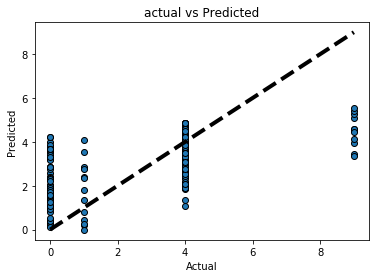

In [99]:
#Visualize the Prediction
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(test_Y, y_predictedgbr, edgecolors=(0, 0, 0))
ax.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'k--', lw=4)
ax.set_title("actual vs Predicted")
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

In [100]:
#Prediction Using Naive Bayes Alg
mb=MultinomialNB()
mb.fit(train_X,train_Y)


predmb = mb.predict(test_X)
print(accuracy_score(test_Y,predmb))
print(confusion_matrix(test_Y,predmb))
print(classification_report(test_Y,predmb))

0.7217847769028871
[[  1   0  80   0]
 [  0   0  14   0]
 [  0   0 274   0]
 [  0   0  12   0]]
              precision    recall  f1-score   support

           0       1.00      0.01      0.02        81
           1       0.00      0.00      0.00        14
           4       0.72      1.00      0.84       274
           9       0.00      0.00      0.00        12

    accuracy                           0.72       381
   macro avg       0.43      0.25      0.22       381
weighted avg       0.73      0.72      0.61       381



In [101]:
#multinomial NB by using Crossval Score
#Cross validation libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
mbn=MultinomialNB()

score=cross_val_score(mbn,X,Y,cv=15)
print('Score:',score)

print('Mean Scores',score.mean())
print('Standard deviation',score.std())

y_pred = cross_val_predict(mbn,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)
conf_mat = confusion_matrix(Y,y_pred)
conf_mat

Score: [0.69230769 0.69230769 0.68376068 0.69230769 0.7008547  0.70689655
 0.68965517 0.69827586 0.69827586 0.71052632 0.7079646  0.7079646
 0.7079646  0.7079646  0.7079646 ]
Mean Scores 0.7003327489635569
Standard deviation 0.008281709919367941
Y Prediction values
[4 4 4 ... 4 4 0]


array([[   6,    0,  374,    4],
       [   0,    0,   69,    0],
       [  13,    0, 1195,    2],
       [   4,    0,   61,    0]], dtype=int64)

In [102]:
#using Support Vector Machinee
svc = SVC(kernel='rbf')
svc.fit(train_X,train_Y)
svc.score(train_X,train_Y)
predsvc=svc.predict(test_X)
print(accuracy_score(test_Y,predsvc))
print(confusion_matrix(test_Y,predsvc))
print(classification_report(test_Y,predsvc))

0.9422572178477691
[[ 72   0   8   1]
 [  9   3   0   2]
 [  1   0 273   0]
 [  1   0   0  11]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        81
           1       1.00      0.21      0.35        14
           4       0.97      1.00      0.98       274
           9       0.79      0.92      0.85        12

    accuracy                           0.94       381
   macro avg       0.91      0.75      0.77       381
weighted avg       0.94      0.94      0.93       381



In [103]:
#Support Vector Machine by using Crossval Score
sv = SVC()

score=cross_val_score(sv,X,Y,cv=5,scoring='accuracy')
print('accuracy Score=',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(sv,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

from sklearn.metrics import accuracy_score
accuracy_score(Y,y_pred)

accuracy Score= [0.69075145 0.80346821 0.63872832 0.82080925 0.89534884]
Mean Scores 0.7698212125285657
Standard Deviation 0.09265684897639309
Y Prediction values
[4 4 4 ... 4 1 9]


0.7696759259259259

In [104]:
#Use GridSearchCV for Support Vector Machin
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
gridsv = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
gridsv.fit(train_X, train_Y)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.693, total=   0.2s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s



[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.695, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.696, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.693, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.695, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.696, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.693, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.695, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.696, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    8.5s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [105]:

# print best parameter after tuning 
print(gridsv.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(gridsv.best_estimator_)

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [106]:
# Re-run predictions and see classification report 

grid_predictions = gridsv.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        81
           1       1.00      1.00      1.00        14
           4       1.00      1.00      1.00       274
           9       1.00      1.00      1.00        12

    accuracy                           1.00       381
   macro avg       1.00      1.00      1.00       381
weighted avg       1.00      1.00      1.00       381



In [107]:
#Boosting through Support Vector Classifier

from sklearn import metrics

svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1,algorithm='SAMME.R')

#abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1,algorithm='SAMME')

# Train Adaboost Classifer
modelsvboost = abc.fit(train_X,train_Y)

#Predict the response for test dataset
y_pred = modelsvboost.predict(test_X)


print("Accuracy:",metrics.accuracy_score(test_Y, y_pred))

Accuracy: 0.7191601049868767


In [108]:
#Using DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(train_X,train_Y)
dtc.score(train_X,train_Y)
preddtc=dtc.predict(test_X)
print(accuracy_score(test_Y,preddtc))
print(confusion_matrix(test_Y,preddtc))
print(classification_report(test_Y,preddtc))

0.9711286089238845
[[ 75   2   4   0]
 [  2  12   0   0]
 [  3   0 271   0]
 [  0   0   0  12]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93        81
           1       0.86      0.86      0.86        14
           4       0.99      0.99      0.99       274
           9       1.00      1.00      1.00        12

    accuracy                           0.97       381
   macro avg       0.95      0.94      0.94       381
weighted avg       0.97      0.97      0.97       381



In [109]:
#DecisionTreeClassifier by using Crossval Score
dt=DecisionTreeClassifier(criterion='gini')
score=cross_val_score(dt,X,Y,cv=5,scoring='f1_macro')

print('F1-score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(dt,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

F1-score: [0.4167965  0.57454024 0.51871026 0.71270266 0.77624778]
Mean Scores 0.599799487281879
Standard Deviation 0.13006514871956887
Y Prediction values
[4 4 4 ... 4 1 9]


array([[ 204,   66,   87,   27],
       [  10,   52,    4,    3],
       [ 144,    3, 1063,    0],
       [  26,   13,    0,   26]], dtype=int64)

In [111]:
#Using GridSearchCV for DecisionTreeClassifie
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
dt_grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
dt_grid_search_cv.fit(train_X, train_Y)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    7.9s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16

In [112]:
# print best parameter after tuning 
print(dt_grid_search_cv.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(dt_grid_search_cv.best_estimator_)

{'max_leaf_nodes': 75, 'min_samples_split': 2}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=75,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')


In [113]:
# Re-run predictions and see classification report 

grid_predictions = dt_grid_search_cv.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        81
           1       0.93      0.93      0.93        14
           4       0.99      0.98      0.98       274
           9       1.00      1.00      1.00        12

    accuracy                           0.97       381
   macro avg       0.96      0.96      0.96       381
weighted avg       0.97      0.97      0.97       381



In [116]:
#Boost Decision Tree Classifier
from sklearn.ensemble import AdaBoostClassifier

dtbclassifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
dtbclassifier.fit(train_X, train_Y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [117]:
predictions = dtbclassifier.predict(test_X)
predictions


array([4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 1, 9, 4, 0, 9, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 9, 1, 4, 0, 4, 0, 0, 4, 4, 4, 4, 0, 4, 0, 4, 1, 0, 0, 4, 0, 4,
       4, 4, 4, 4, 0, 4, 1, 4, 4, 4, 0, 9, 4, 4, 4, 0, 4, 4, 4, 0, 1, 4,
       4, 4, 0, 0, 4, 9, 4, 0, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 0, 4, 4,
       4, 0, 4, 0, 4, 4, 4, 4, 4, 0, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 1, 1, 4, 0, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 0, 4, 0, 4, 4, 4, 4, 4, 4, 9, 4, 4, 9, 4, 4, 4, 4,
       4, 0, 0, 0, 0, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 0, 4,
       4, 4, 0, 0, 4, 4, 9, 4, 4, 4, 4, 1, 4, 4, 0, 4, 4, 4, 4, 1, 9, 4,
       4, 0, 0, 4, 4, 4, 4, 4, 0, 4, 1, 1, 4, 4, 4, 4, 4, 0, 4, 9, 0, 9,
       4, 4, 4, 4, 0, 0, 4, 0, 1, 4, 0, 4, 4, 4, 4, 4, 1, 0, 0, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 0, 4, 0, 4, 4, 4, 4, 4, 1, 4, 4, 4, 0, 0, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4,

In [118]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictions))


0.7874015748031497


In [119]:
confusion_matrix(test_Y, predictions)

array([[ 40,   2,  34,   5],
       [  0,   7,   6,   1],
       [ 25,   8, 241,   0],
       [  0,   0,   0,  12]], dtype=int64)

In [120]:
print(classification_report(test_Y, predictions))

              precision    recall  f1-score   support

           0       0.62      0.49      0.55        81
           1       0.41      0.50      0.45        14
           4       0.86      0.88      0.87       274
           9       0.67      1.00      0.80        12

    accuracy                           0.79       381
   macro avg       0.64      0.72      0.67       381
weighted avg       0.78      0.79      0.78       381



In [121]:
#Using RandomForest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_X,train_Y)
rf.score(train_X,train_Y)
predf=rf.predict(test_X)
print(accuracy_score(test_Y,predf))
print(confusion_matrix(test_Y,predf))
print(classification_report(test_Y,predf))

0.9763779527559056
[[ 79   1   1   0]
 [  2  12   0   0]
 [  4   0 270   0]
 [  1   0   0  11]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        81
           1       0.92      0.86      0.89        14
           4       1.00      0.99      0.99       274
           9       1.00      0.92      0.96        12

    accuracy                           0.98       381
   macro avg       0.96      0.93      0.95       381
weighted avg       0.98      0.98      0.98       381



In [122]:
#RandomForestClassifier Using Cross_Val_Score
rf1=RandomForestClassifier()

score=cross_val_score(rf1,X,Y,cv=10,scoring='accuracy')

print('Accuracy score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(rf1,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

print("y_pred.shape",y_pred.shape)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

Accuracy score: [0.77586207 0.74137931 0.83908046 0.75287356 0.85549133 0.8372093
 0.8255814  0.9244186  0.93604651 0.93567251]
Mean Scores 0.8423615060351992
Standard Deviation 0.06880126289674864
Y Prediction values
[4 4 4 ... 4 1 9]
y_pred.shape (1728,)


array([[ 201,   33,  135,   15],
       [  24,   40,    1,    4],
       [ 128,    4, 1078,    0],
       [  24,    7,    0,   34]], dtype=int64)

In [123]:
#GridSearchCV for Random Forest Classifie
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf2 = RandomForestClassifier()
# Instantiate the grid search model
grid_search_rf2 = GridSearchCV(estimator = rf2, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search_rf2.fit(train_X,train_Y)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  7.8min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [124]:

# print best parameter after tuning 
print(grid_search_rf2.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_search_rf2.best_estimator_)

{'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=80, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [125]:
# Re-run predictions and see classification report 

predictions = (grid_search_rf2.predict(test_X))
  
# print classification report 
print(classification_report(test_Y, predictions)) 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        81
           1       1.00      0.86      0.92        14
           4       0.99      0.99      0.99       274
           9       0.86      1.00      0.92        12

    accuracy                           0.98       381
   macro avg       0.95      0.95      0.95       381
weighted avg       0.98      0.98      0.98       381



In [127]:
#Bagging of Random Forest Classifie
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
baggingrf = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
baggingrf.fit(train_X, train_Y)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=0.5,
                  max_samples=0.5, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [128]:
predictionsrf = baggingrf.predict(test_X)
predictionsrf

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 0, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0,
       4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0,
       0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4,
       4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4,
       4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 0, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [129]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictionsrf))
print(classification_report(test_Y, predictionsrf)) 

0.7742782152230971
              precision    recall  f1-score   support

           0       0.71      0.27      0.39        81
           1       0.00      0.00      0.00        14
           4       0.78      1.00      0.88       274
           9       0.00      0.00      0.00        12

    accuracy                           0.77       381
   macro avg       0.37      0.32      0.32       381
weighted avg       0.71      0.77      0.71       381



In [130]:
##Among all the model grid svm gives the (1), so we can save this model.

In [132]:
# saving the predection to a csv file.
prediction = pd.DataFrame(pred, columns=['prediction']).to_csv('Project 14_car_prediction.csv')

In [133]:
#Lets save the above model
from sklearn.externals import joblib

#Save the model as pickle in a file
joblib.dump(gridsv,'14_car_Prediction.pkl')

['14_car_Prediction.pkl']